<a href="https://colab.research.google.com/github/SanaSNavas7/Machine-Learning/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
len(X_train)

60000

In [30]:
len(X_test)

10000

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train=X_train/255
X_test=X_test/255

In [33]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

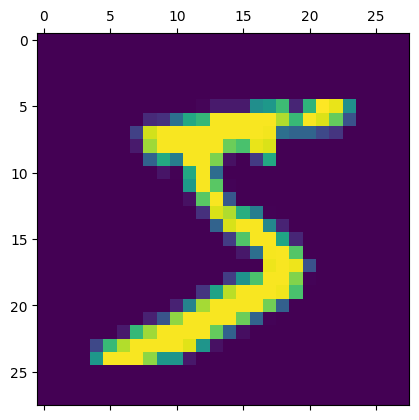

In [34]:
plt.matshow(X_train[0])

In [35]:
y_train[2]

4

In [36]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [38]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [39]:
print(X_test_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
X_test_flattened.shape

(10000, 784)

In [46]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1085 - loss: 2.3018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1120 - loss: 2.3002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1134 - loss: 2.2996
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1122 - loss: 2.2990
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1113 - loss: 2.2981


In [47]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6466 - loss: 1.6254


[1.5798611640930176, 0.6549000144004822]

In [49]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
y_predicted[0]

array([0.49844384, 0.24748453, 0.43844074, 0.4751807 , 0.45982662,
       0.39016518, 0.34839845, 0.7319673 , 0.52098817, 0.5827552 ],
      dtype=float32)

In [51]:
np.argmax(y_predicted[0])

7

In [55]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[967,   0,   1,   2,   0,   0,   1,   0,   9,   0],
       [  0, 615,   2,   6,   0,   0,   5,   0, 507,   0],
       [ 94,   0, 744,  37,   2,   0,  30,   2, 122,   1],
       [ 71,   0,  18, 799,   0,   0,   3,   2, 114,   3],
       [ 64,   0,  16,   2, 463,   0,  41,   0, 195, 201],
       [376,   0,   4, 145,   1,   0,   5,   0, 351,  10],
       [148,   0,  16,   2,   1,   0, 742,   0,  49,   0],
       [ 61,   1,  20,  10,   5,   0,   1, 670, 184,  76],
       [ 56,   0,   5,  42,   1,   0,   5,   1, 862,   2],
       [ 84,   0,  12,  11,   7,   0,   3,   3, 202, 687]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

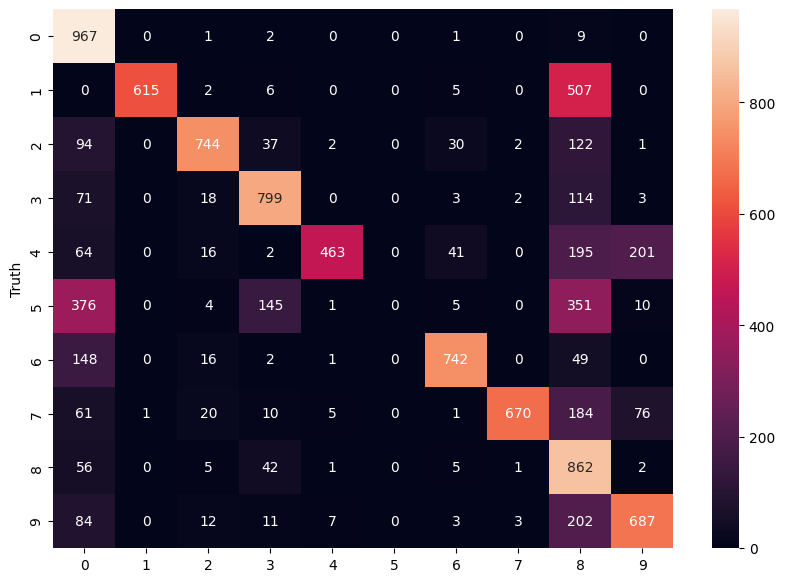

In [59]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.ylabel('Predicted')
plt.ylabel('Truth')

In [60]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1114 - loss: 2.3013
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1119 - loss: 2.3009
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1129 - loss: 2.2991
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1149 - loss: 2.2949
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1455 - loss: 2.2847


In [61]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3268 - loss: 1.7896


[1.7758947610855103, 0.3352000117301941]

Text(95.72222222222221, 0.5, 'Truth')

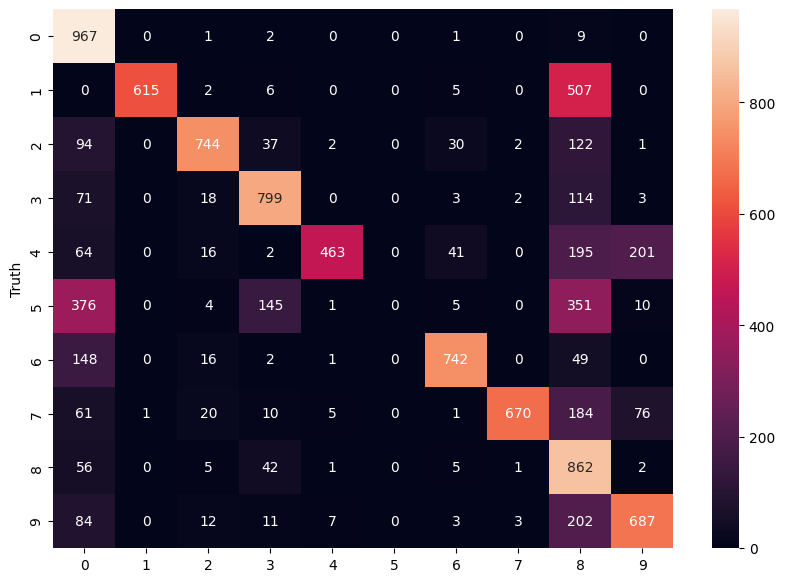

In [62]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.ylabel('Predicted')
plt.ylabel('Truth')

In [64]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1102 - loss: 2.3015
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1128 - loss: 2.3008
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1133 - loss: 2.2994
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1113 - loss: 2.2960
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1344 - loss: 2.2858
